# Marketing Campaign 


Quickly analyze test market campaigns based on responses, revenue and other key metrics. Predict who will respond to which campaign by which channel and why. Increase the likelihood of responses and quality of leads in future campaigns.


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/Ranjitha/MarketingCampaign.csv')
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [3]:
#Dataframe contains 548 rows and 7 columns
df.shape

(548, 7)

In [4]:
#understanding variables
df.dtypes

MarketID              int64
MarketSize           object
LocationID            int64
AgeOfStore            int64
Promotion             int64
week                  int64
SalesInThousands    float64
dtype: object

In [5]:
df.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


In [7]:
#No null values--data is clean
df.isnull().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

In [6]:
df.describe(include=['object'])

,MarketSize
count,548
unique,3
top,Medium
freq,320


In [34]:
df.std()

MarketID              2.877001
LocationID          287.973679
AgeOfStore            6.638345
Promotion             0.810729
week                  1.119055
SalesInThousands     16.755216
dtype: float64

In [33]:
df.MarketID.value_counts(normalize='True')

3     0.160584
10    0.145985
7     0.109489
6     0.109489
5     0.109489
1     0.094891
8     0.087591
9     0.072993
4     0.065693
2     0.043796
Name: MarketID, dtype: float64

In [30]:
df.var()

MarketID                8.277132
LocationID          82928.840043
AgeOfStore             44.067628
Promotion               0.657281
week                    1.252285
SalesInThousands      280.737257
dtype: float64

In [28]:
df.min()
df['SalesInThousands'].min()


17.34

In [22]:
df['MarketID'].mean()

5.7153284671532845

In [18]:
df.mean(axis=0)

MarketID              5.715328
LocationID          479.656934
AgeOfStore            8.503650
Promotion             2.029197
week                  2.500000
SalesInThousands     53.466204
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002599E34BD30>]], dtype=object)

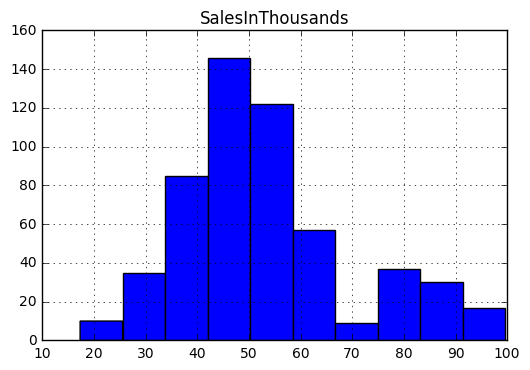

In [10]:
%matplotlib inline
df.hist(column='SalesInThousands')

C:\Users\Ranjitha\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x2599fa8ff98>],
 'caps': [<matplotlib.lines.Line2D at 0x2599fa9ca58>,
 'fliers': [<matplotlib.lines.Line2D at 0x2599faa1b70>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2599fa8fd30>],
 'whiskers': [<matplotlib.lines.Line2D at 0x2599fa979e8>,
  <matplotlib.lines.Line2D at 0x2599fa97b70>]}

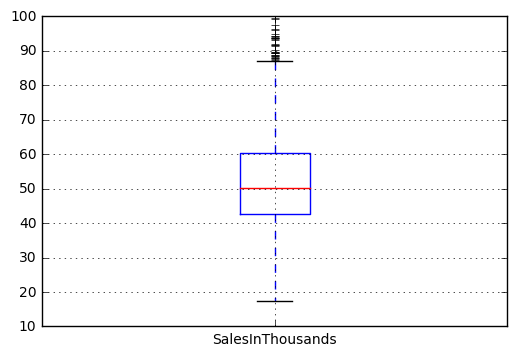

In [35]:
df.boxplot(column='SalesInThousands')

In [36]:
#most of the markets are medium sized
df.MarketSize.value_counts()

Medium    320
Large     168
Small      60
Name: MarketSize, dtype: int64

In [37]:
df.Promotion.value_counts(normalize='True')

3    0.343066
2    0.343066
1    0.313869
Name: Promotion, dtype: float64

In [38]:
df.week.value_counts()

4    137
3    137
2    137
1    137
Name: week, dtype: int64

In [49]:
df.LocationID.value_counts()

920    4
302    4
308    4
307    4
306    4
305    4
304    4
303    4
301    4
503    4
222    4
221    4
220    4
219    4
218    4
217    4
309    4
401    4
402    4
403    4
404    4
405    4
406    4
407    4
408    4
409    4
410    4
411    4
412    4
413    4
      ..
507    4
508    4
509    4
510    4
511    4
512    4
513    4
514    4
515    4
601    4
602    4
603    4
604    4
606    4
706    4
607    4
608    4
609    4
610    4
611    4
612    4
613    4
614    4
615    4
701    4
702    4
703    4
704    4
705    4
1      4
Name: LocationID, dtype: int64

In [39]:
df.AgeOfStore.value_counts()

1     80
4     44
5     44
7     40
8     40
6     36
3     32
9     28
12    24
10    24
2     20
13    20
19    20
11    16
14    12
22    12
24    12
15     8
18     8
23     8
27     4
17     4
20     4
25     4
28     4
Name: AgeOfStore, dtype: int64

In [40]:
#14% of stores participated in campaign are recently opened
df.AgeOfStore.value_counts(normalize='True')

1     0.145985
4     0.080292
5     0.080292
7     0.072993
8     0.072993
6     0.065693
3     0.058394
9     0.051095
12    0.043796
10    0.043796
2     0.036496
13    0.036496
19    0.036496
11    0.029197
14    0.021898
22    0.021898
24    0.021898
15    0.014599
18    0.014599
23    0.014599
27    0.007299
17    0.007299
20    0.007299
25    0.007299
28    0.007299
Name: AgeOfStore, dtype: float64

In [16]:
pd.crosstab(df.MarketSize,df.SalesInThousands)

SalesInThousands,17.34,19.26,22.18,23.35,23.44,23.93,24.75,24.77,24.82,25.4,...,93.86,94.17,94.21,94.43,94.89,96.01,96.48,97.61,99.12,99.65
MarketSize,,,,,,,,,,,,,,,,,,,,,
Large,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Medium,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Small,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:

# Define bins as 0 to 20, 20 to 40, 40 to 60, 60 to 80, 80 to 100
bins = [0,20,40,60,80,100]
salesGroups = ['V.low', 'Low','Average', 'Medium', 'High']
df['salesRange'] = pd.cut(df.SalesInThousands, bins, labels=salesGroups)
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands,salesRange
0,1,Medium,1,4,3,1,33.73,Low
1,1,Medium,1,4,3,2,35.67,Low
2,1,Medium,1,4,3,3,29.03,Low
3,1,Medium,1,4,3,4,39.25,Low
4,1,Medium,2,5,2,1,27.81,Low


In [47]:
#binning age of stores
bins=[0,8,16,24,32]
group=['Recent','good','moreThanDecade','senior']
df['StoreageClasif']=pd.cut(df.AgeOfStore,bins,labels=group)
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands,salesRange,StoreageClasif
0,1,Medium,1,4,3,1,33.73,Low,Recent
1,1,Medium,1,4,3,2,35.67,Low,Recent
2,1,Medium,1,4,3,3,29.03,Low,Recent
3,1,Medium,1,4,3,4,39.25,Low,Recent
4,1,Medium,2,5,2,1,27.81,Low,Recent


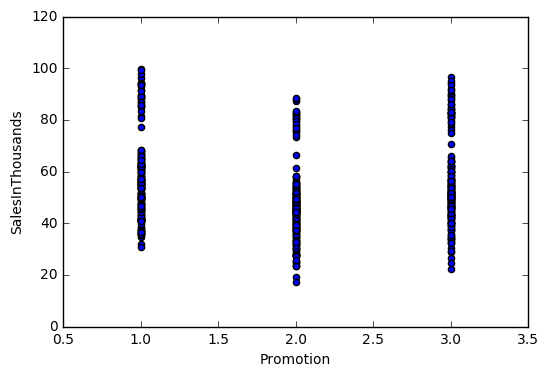

In [50]:
df.plot(x='Promotion',y='SalesInThousands',kind='scatter')

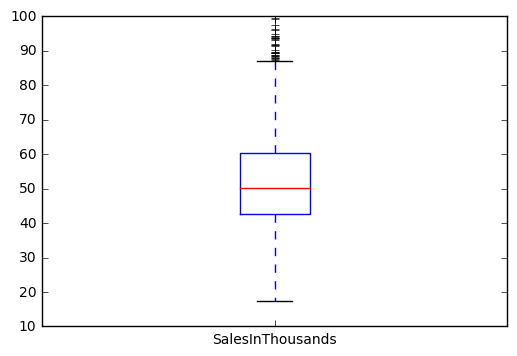

In [54]:
df.plot(x='MarketSize',y='SalesInThousands',kind='box')

In [55]:
pd.crosstab(df.MarketSize,df.salesRange)
# Only Large market size having highest sales range
#Highest sales range is Average(40-60k) irrespective of market size

salesRange,V.low,Low,Average,Medium,High
MarketSize,,,,,
Large,0,1,59,39,69
Medium,2,96,214,8,0
Small,0,1,36,23,0


In [22]:
pd.crosstab(df.MarketSize,df.salesRange,normalize=True)

salesRange,V.low,Low,Average,Medium,High
MarketSize,,,,,
Large,0.00000,0.001825,0.107664,0.071168,0.125912
Medium,0.00365,0.175182,0.390511,0.014599,0.000000
Small,0.00000,0.001825,0.065693,0.041971,0.000000


In [27]:
pd.crosstab(df.week,df.salesRange)

salesRange,V.low,Low,Average,Medium,High
week,,,,,
1,0,24,83,11,19
2,1,25,75,20,16
3,0,25,78,17,17
4,1,24,73,22,17


In [29]:
pd.crosstab([df.Promotion,df.week],df.salesRange)
#irrespective of promotion type and number of weeks of promotion highers number of salees are in the range of 40-60K
#promotion type 3 achieved sales range of high compared to promotion type 2 and 1

salesRange      V.low  Low  Average  Medium  High
Promotion week                                   
1         1         0    3       27       6     7
          2         0    6       20      10     7
          3         0    3       25       9     6
          4         0    5       20      11     7
2         1         0   14       27       3     3
          2         1   13       27       3     3
          3         0   14       27       2     4
          4         1   14       25       5     2
3         1         0    7       29       2     9
          2         0    6       28       7     6
          3         0    8       26       6     7
          4         0    5       28       6     8

In [59]:
#Negative covariance between type pf promotion and sales 
df.Promotion.cov(df.SalesInThousands)


-0.80433138953015126

In [62]:
df.corr()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
MarketID,1.000000,0.999843,-0.050295,-0.046592,0.000000,-0.192389
LocationID,0.999843,1.000000,-0.050736,-0.049915,0.000000,-0.187852
AgeOfStore,-0.050295,-0.050736,1.000000,0.059765,0.000000,-0.028533
Promotion,-0.046592,-0.049915,0.059765,1.000000,0.000000,-0.059212
week,0.000000,0.000000,0.000000,0.000000,1.000000,-0.010984
SalesInThousands,-0.192389,-0.187852,-0.028533,-0.059212,-0.010984,1.000000


In [65]:
df[['MarketID','LocationID','AgeOfStore']].corr()

,MarketID,LocationID,AgeOfStore
MarketID,1.000000,0.999843,-0.050295
LocationID,0.999843,1.000000,-0.050736
AgeOfStore,-0.050295,-0.050736,1.000000


In [57]:
#Average Sales for each marketID
df.groupby(['MarketID','week']).SalesInThousands.mean()
#marketId 3 having highest average sales 

MarketID  week
1         1       36.389231
          2       34.219231
          3       35.456154
          4       34.342308
2         1       61.660000
          2       62.220000
          3       61.455000
          4       61.710000
3         1       86.973182
          2       83.092273
          3       85.340000
          4       84.481364
4         1       52.635556
          2       56.312222
          3       51.277778
          4       57.806667
5         1       48.655333
          2       50.556667
          3       48.364000
          4       47.776000
6         1       37.172000
          2       36.090000
          3       36.046000
          4       36.282000
7         1       45.846000
          2       44.406000
          3       44.971333
          4       42.678000
8         1       50.160833
          2       49.672500
          3       47.915833
          4       48.062500
9         1       50.222000
          2       54.354000
          3       55.196000
     

In [43]:
df[df.SalesInThousands>=80.0]

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands,salesRange
76,3,Large,201,4,3,1,86.14,High
77,3,Large,201,4,3,2,82.56,High
80,3,Large,202,8,1,1,88.73,High
81,3,Large,202,8,1,2,85.21,High
82,3,Large,202,8,1,3,81.55,High
83,3,Large,202,8,1,4,94.17,High
84,3,Large,203,12,3,1,89.70,High
86,3,Large,203,12,3,3,84.05,High
87,3,Large,203,12,3,4,81.18,High
88,3,Large,204,1,2,1,87.43,High


In [44]:
df.corr()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
MarketID,1.000000,0.999843,-0.050295,-0.046592,0.000000,-0.192389
LocationID,0.999843,1.000000,-0.050736,-0.049915,0.000000,-0.187852
AgeOfStore,-0.050295,-0.050736,1.000000,0.059765,0.000000,-0.028533
Promotion,-0.046592,-0.049915,0.059765,1.000000,0.000000,-0.059212
week,0.000000,0.000000,0.000000,0.000000,1.000000,-0.010984
SalesInThousands,-0.192389,-0.187852,-0.028533,-0.059212,-0.010984,1.000000


In [45]:
df.cov()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
MarketID,8.277132,828.370168,-0.960568,-0.108675,0.000000,-9.274044
LocationID,828.370168,82928.840043,-96.989605,-11.653585,0.000000,-906.396551
AgeOfStore,-0.960568,-96.989605,44.067628,0.321648,0.000000,-3.173624
Promotion,-0.108675,-11.653585,0.321648,0.657281,0.000000,-0.804331
week,0.000000,0.000000,0.000000,0.000000,1.252285,-0.205941
SalesInThousands,-9.274044,-906.396551,-3.173624,-0.804331,-0.205941,280.737257


In [46]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028020E9CE10>]], dtype=object)

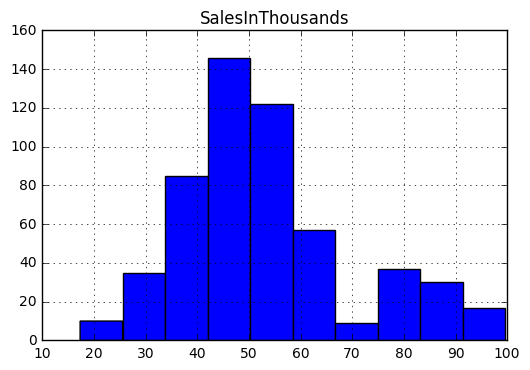

In [47]:
df.hist(column='SalesInThousands')

In [66]:
df[['MarketID','LocationID','AgeOfStore']].cov()

,MarketID,LocationID,AgeOfStore
MarketID,8.277132,828.370168,-0.960568
LocationID,828.370168,82928.840043,-96.989605
AgeOfStore,-0.960568,-96.989605,44.067628
